Exercicio em aula

Importacoes

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [220]:

df = pd.read_csv('churn.csv')

In [221]:
pd.set_option('display.max_columns', None)

In [222]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Analise da variavel Senior Citizen

In [224]:
#df['SeniorCitizen'].nunique()
df['SeniorCitizen'].unique()

array([0, 1])

Analise da variavel tenure

In [225]:
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Analise da var. TotalCharges

In [226]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(6531,), dtype=object)

Decobrimos que a variavel total charges esta com valores string qdo eram para ser numericos

verificacao de dados nulos

In [227]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [228]:
df.duplicated().sum()

np.int64(0)

In [229]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Processamento dos dados

In [230]:
df= df.drop(['customerID'], axis=1)

transf de variaveis

In [231]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [233]:
cat_cols = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
    "PaperlessBilling", "PaymentMethod"]

Aplicar one hot encoding

In [234]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first =True)

In [235]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7043 non-null   object 
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

trans chunr

In [236]:
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes':1, 'No':0})

In [237]:
df_encoded['Churn'].value_counts() 

Churn
0    5174
1    1869
Name: count, dtype: int64

In [238]:
df=df_encoded

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

Modelagem

Definicao das variaveis

In [240]:
X = df.drop('Churn', axis=1)
y = df['Churn']

Separa em treino e teste

In [241]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

Normalizar não sera necessário por ser var. categoricas

escolha do modelo

In [242]:
model_rf = RandomForestClassifier(n_estimators=100,random_state=42)


treinamento do modelo fit

In [243]:
model_rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


previsoes

In [244]:
y_pred = model_rf.predict(x_test)
y_pred_proba = model_rf.predict_proba(x_test)[:, 1]

In [245]:
classification = classification_report(y_test, y_pred)

print(classification)

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



matriz

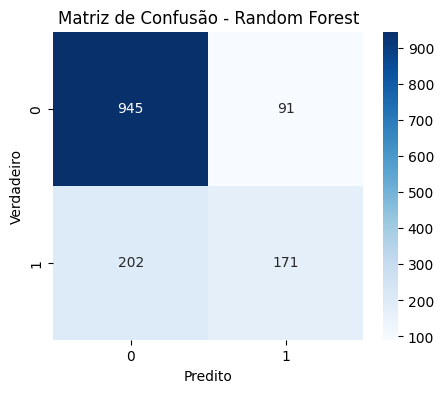

In [246]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
plt.show()

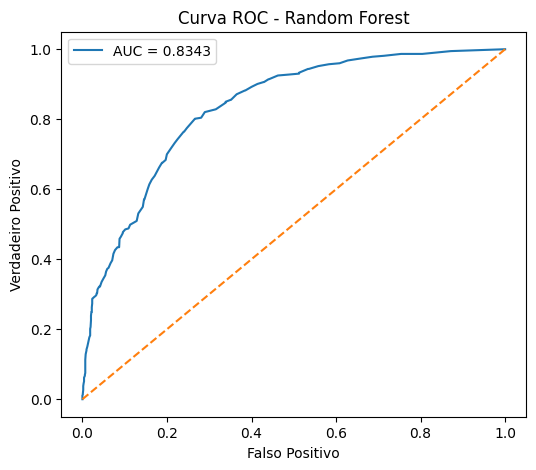

In [247]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.show()

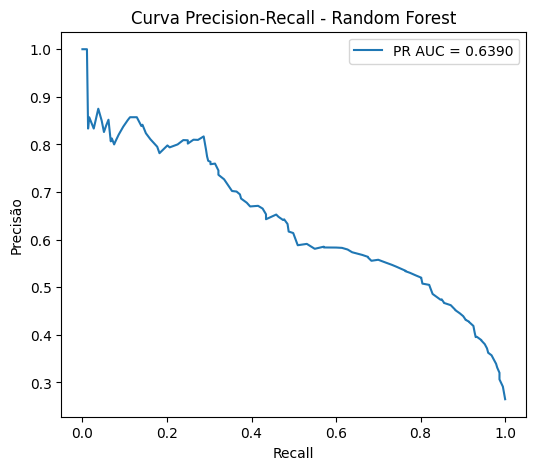

In [248]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
 
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precisão")
plt.title("Curva Precision-Recall - Random Forest")
plt.legend()
plt.show()

light gbm

In [249]:
model_lgb= LGBMClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth= -1,
    
    random_state=42
                          
                          
                          )

Definição do modelo

In [250]:
model_lgbm = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)
 
model_lgbm.fit(x_train, y_train)
 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,300
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


Treinamento

In [251]:
y_pred_lgbm = model_lgbm.predict(x_test)
y_proba_lgbm = model_lgbm.predict_proba(x_test)[:, 1]
 


In [252]:
print("Classification Report - LightGBM")
print(classification_report(y_test, y_pred_lgbm))

Classification Report - LightGBM
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



xgboost

In [253]:
model_xgb= XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth= 6,    
    random_state=42)

In [254]:
model_xgb.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [255]:
y_pred_xgb =model_xgb.predict(x_test) 
y_proba_xgb = model_xgb.predict_proba(x_test)[:,1]

In [256]:
print("Classification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))

Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.65      0.55      0.60       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



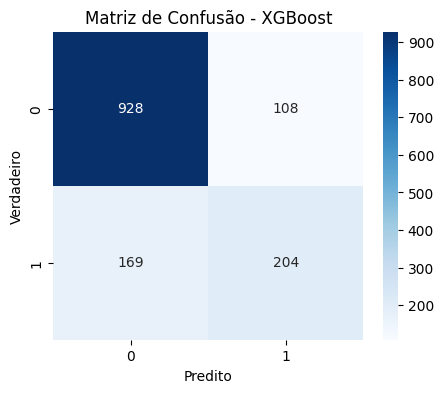

In [257]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - XGBoost")
plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
plt.show()

otimização de hiperparametros com  xgboost  -->  para casa escolher um metodo de tunning

In [258]:
import optuna
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold


def objective_churn(trial):
    # Espaço de busca para os hiperparâmetros
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
       # 'use_label_encoder': False,
        'random_state': 42,
        
        # Parâmetros para ajuste (sugeridos pelo Optuna)
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 1.0),
        
        # Adicionar o parâmetro de balanceamento de classes
        # A proporção é (Total de Não-Churn) / (Total de Churn)
        # y_train.value_counts()[0] / y_train.value_counts()[1] ≈ 4138 / 1496 ≈ 2.76
        # Como o problema é desbalanceado, é crucial usar este parâmetro
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 2.5, 3.5),
    }
    
    # Treinar o modelo
    model = xgb.XGBClassifier(**param)
    model.fit(x_train, y_train, verbose=False)
    
    # Fazer previsões de probabilidade na base de teste
    y_proba = model.predict_proba(x_test)[:, 1]
    
    # Calcular a métrica de otimização (AUC-ROC)
    auc_score = roc_auc_score(y_test, y_proba)
    
    return auc_score

In [259]:
# Criar um estudo Optuna
# Direção 'maximize' pois queremos maximizar o AUC-ROC
study = optuna.create_study(direction='maximize')

# Otimizar a função objetivo por 50 tentativas (o número pode ser ajustado)
# n_trials é o número de combinações de hiperparâmetros que o Optuna irá testar.
study.optimize(objective_churn, n_trials=50, n_jobs=-1)

# Imprimir os melhores resultados
print(f"Melhores parâmetros (Optuna): {study.best_params}")
print(f"Melhor valor da métrica AUC-ROC (Optuna): {study.best_value:.4f}")

[I 2025-12-09 21:10:58,518] A new study created in memory with name: no-name-8d0d583c-6613-4d62-9baf-0bac1a7808cc
[I 2025-12-09 21:10:59,162] Trial 1 finished with value: 0.8623753972279441 and parameters: {'n_estimators': 217, 'max_depth': 4, 'learning_rate': 0.01601701445000456, 'subsample': 0.9458319026491002, 'colsample_bytree': 0.9844922678784583, 'min_child_weight': 4, 'gamma': 0.4767137517776283, 'scale_pos_weight': 3.457294979527955}. Best is trial 1 with value: 0.8623753972279441.
[I 2025-12-09 21:10:59,558] Trial 2 finished with value: 0.8636317761652883 and parameters: {'n_estimators': 269, 'max_depth': 3, 'learning_rate': 0.05688278977375964, 'subsample': 0.9105663588196853, 'colsample_bytree': 0.5903501369785875, 'min_child_weight': 10, 'gamma': 0.5233948119913406, 'scale_pos_weight': 2.565577189147763}. Best is trial 2 with value: 0.8636317761652883.
[I 2025-12-09 21:11:01,630] Trial 3 finished with value: 0.8419291562723198 and parameters: {'n_estimators': 785, 'max_dept

Melhores parâmetros (Optuna): {'n_estimators': 397, 'max_depth': 5, 'learning_rate': 0.010879716382597873, 'subsample': 0.6313597563053432, 'colsample_bytree': 0.5003881457076945, 'min_child_weight': 5, 'gamma': 0.9613113400935033, 'scale_pos_weight': 2.7243390522622404}
Melhor valor da métrica AUC-ROC (Optuna): 0.8664


/usr/local/python/3.12.1/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [21:11:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


---
Relatório de Classificação - XGBoost Otimizado (Optuna)
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1036
           1       0.54      0.82      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409



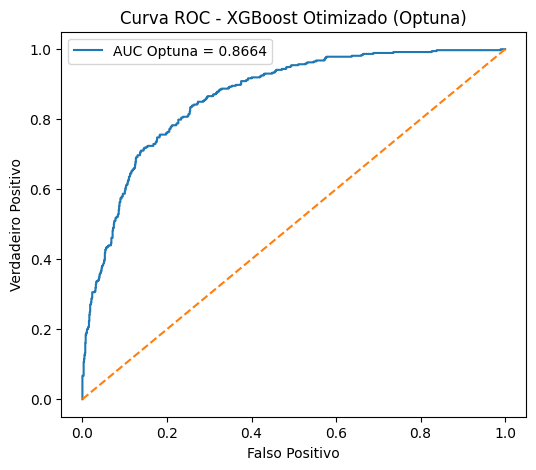

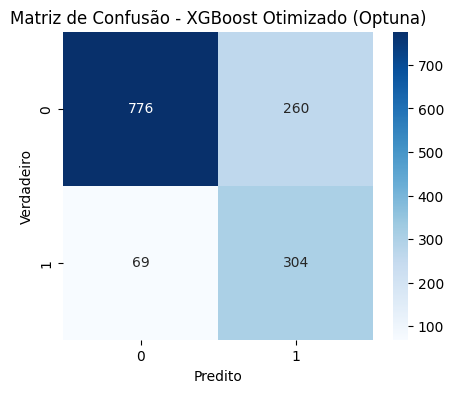

In [260]:
# Usar o melhor modelo encontrado
best_model_xgb_optuna = xgb.XGBClassifier(**study.best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
best_model_xgb_optuna.fit(x_train, y_train)

# Previsões
y_pred_optuna = best_model_xgb_optuna.predict(x_test)
y_proba_optuna = best_model_xgb_optuna.predict_proba(x_test)[:, 1]

# Relatório de Classificação
print("---")
print("Relatório de Classificação - XGBoost Otimizado (Optuna)")
print(classification_report(y_test, y_pred_optuna))

# Curva ROC e AUC
fpr_optuna, tpr_optuna, _ = roc_curve(y_test, y_proba_optuna)
roc_auc_optuna = auc(fpr_optuna, tpr_optuna)

plt.figure(figsize=(6,5))
plt.plot(fpr_optuna, tpr_optuna, label=f"AUC Optuna = {roc_auc_optuna:.4f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC - XGBoost Otimizado (Optuna)")
plt.legend()
plt.show()

# Matriz de Confusão
cm_optuna = confusion_matrix(y_test, y_pred_optuna)
plt.figure(figsize=(5,4))
sns.heatmap(cm_optuna, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - XGBoost Otimizado (Optuna)")
plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
plt.show()

Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.65      0.55      0.60       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



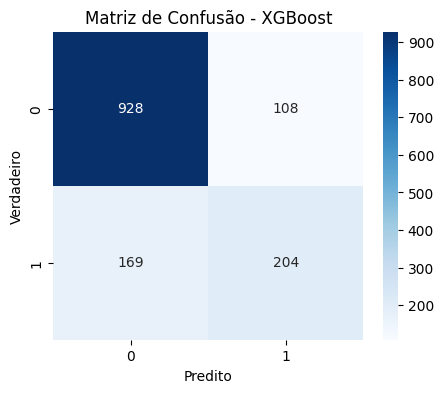

In [261]:
print("Classification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - XGBoost")
plt.xlabel("Predito"); plt.ylabel("Verdadeiro")
plt.show()

Relatório de Classificação - XGBoost Otimizado (Optuna)
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1036
           1       0.54      0.82      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409


Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.65      0.55      0.60       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



### Houve uma otimização do recall da classe 1 de 55% para 82%
### Já a precisão da classe 1 foi de 65% para 54% Aqui pode resultar em maior custo com ações de retenção.
### O modelo  otimizado desmonstrou que consegue atuar com maior eficiência na redução do churn
